<a href="https://colab.research.google.com/github/XieN-N/Classification-of-Russian-texts-into-topics/blob/main/Classification_of_iris_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=3500)]
    )

logical_gpus = tf.config.list_logical_devices('GPU')
print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")

print(tf.__version__)
print(tf.executing_eagerly())

1 Physical GPU, 1 Logical GPUs
2.17.0
True


In [ ]:
import os
from random import shuffle
from glob import glob

IMG_SIZE = (224, 224)

In [ ]:
os.listdir('data/iris')

['virginica', 'versicolour', 'setosa']

In [ ]:
import PIL
from PIL import Image
def load_dataset(irises=True):
    if irises:
        counter = 0
        for iris_variant in os.listdir('data/iris'):
            iris_files = glob(f'data/iris/{iris_variant}/*.jpg')
            counter += len(iris_files)

        X = np.zeros((counter, IMG_SIZE[0], IMG_SIZE[1], 3))
        y = np.zeros((counter,))

        i = 0
        j = 0
        for iris_variant in os.listdir('data/iris'):
            iris_files = glob(f'data/iris/{iris_variant}/*.jpg')
            for iris in iris_files:
                img = cv2.imread(f'{iris}')
                rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(rgb_img, (224, 224))
                img_np = np.array(img)
                X[i] = img_np
                y[i] = j
                i+=1
            j+=1
    return (X, y)

In [ ]:
X, y = load_dataset()

In [ ]:
y_cat = tf.keras.utils.to_categorical(y)

In [ ]:
y_cat.shape

(421, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)

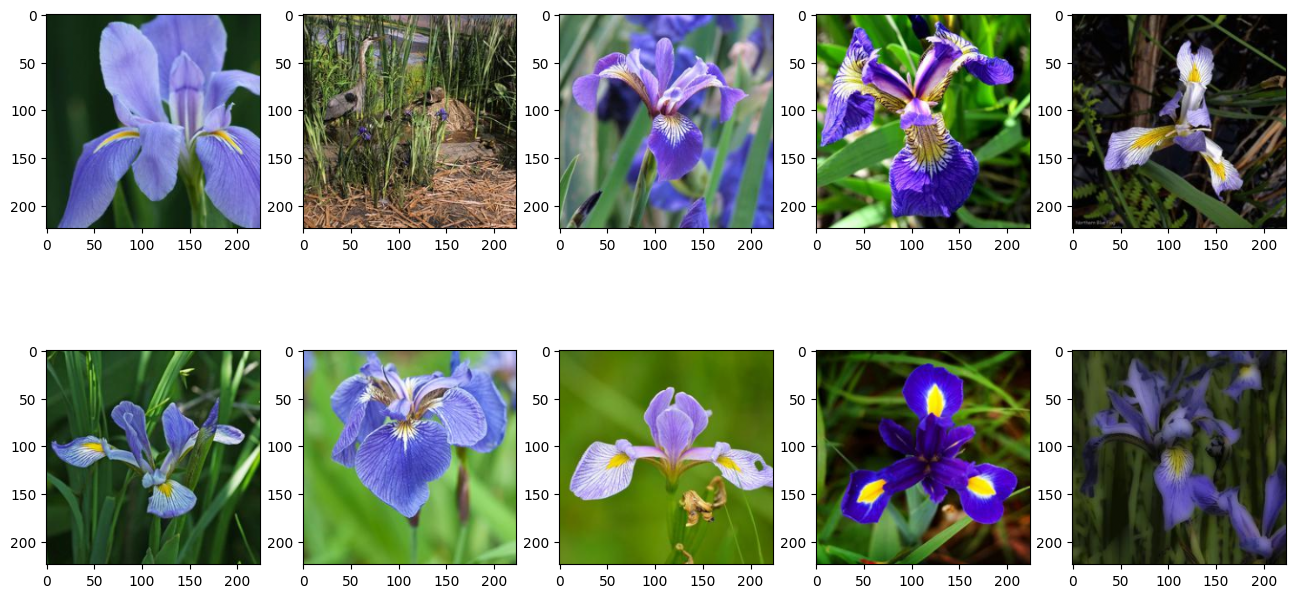

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(X_train[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    plt.imshow(path/255)

In [ ]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='irises')

In [ ]:
model.summary()

Model: "irises"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │       301,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,936,323 (30.27 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.2)

Epoch 1/30
 3/27 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3944 - loss: 1415.7324

I0000 00:00:1726541906.577880    5456 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.4698 - loss: 1539.1505 - val_accuracy: 0.4412 - val_loss: 858.3348
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8192 - loss: 401.9725 - val_accuracy: 0.6029 - val_loss: 779.8626
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9235 - loss: 188.3765 - val_accuracy: 0.6618 - val_loss: 799.5135
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9138 - loss: 204.6017 - val_accuracy: 0.6618 - val_loss: 1560.6660
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9558 - loss: 138.1150 - val_accuracy: 0.6471 - val_loss: 1778.9508
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9610 - loss: 184.3808 - val_accuracy: 0.5147 - val_loss: 1322.5338
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9715 - loss: 85.1422 - val_accuracy: 0.6471 - val_loss: 2247.9788
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9670 - loss: 127.6202 -

In [ ]:
model.save('irises-vgg16.hdf5')

In [ ]:
model = tf.keras.models.load_model('irises-vgg16.hdf5')

In [ ]:
model.evaluate(X_test, y_test)

2024-09-17 12:59:47.109903: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.74GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.6556 - loss: 3176.3345


[2969.22314453125, 0.6705882549285889]

In [ ]:
pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step


In [ ]:
def from_softmax_to_iris(a):
    if a[0] == 1:
        return os.listdir('data/iris')[0]
    elif a[1] == 1:
        return os.listdir('data/iris')[1]
    elif a[2] == 1:
        return os.listdir('data/iris')[2]
    else:
        return 'Failure'

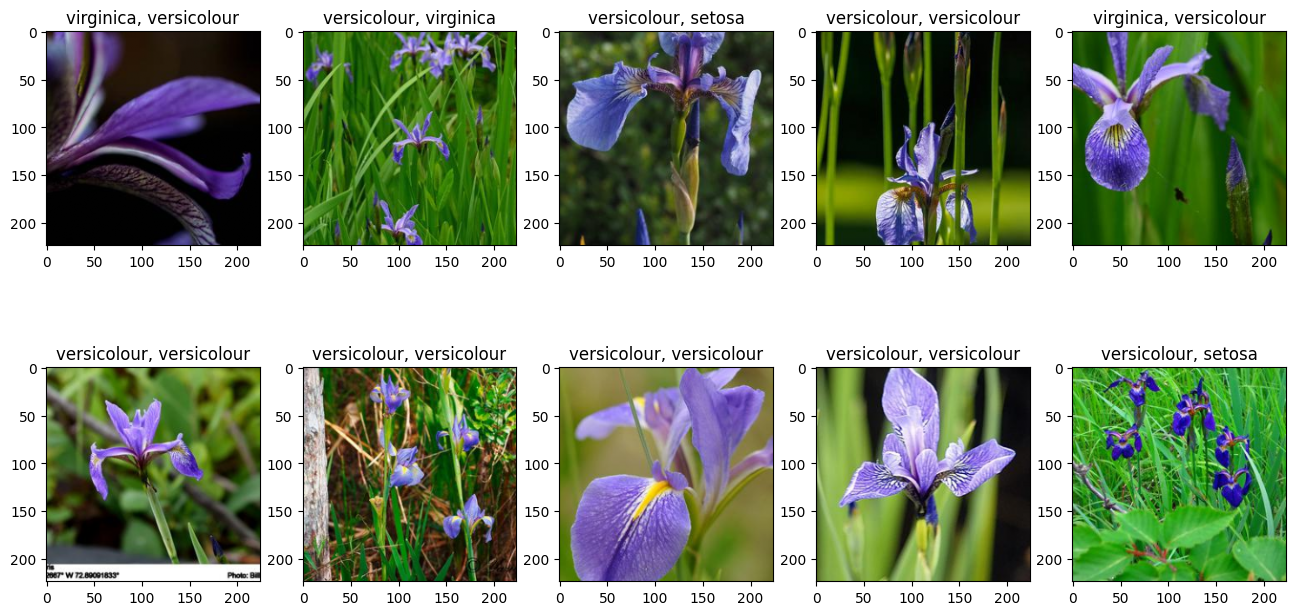

In [ ]:
fig = plt.figure(figsize=(16, 8))
length = 10
for i, path, score, real in zip(range(length), X_test[:length], pred[:length], y_test[:length]):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_title(f'{from_softmax_to_iris(score)}, {from_softmax_to_iris(real)}') # subplot.set_title('%.2f %s' % (score, os.path.basename(path))
    subplot.imshow(path/255)

Real: versicolour
Prediction: versicolour


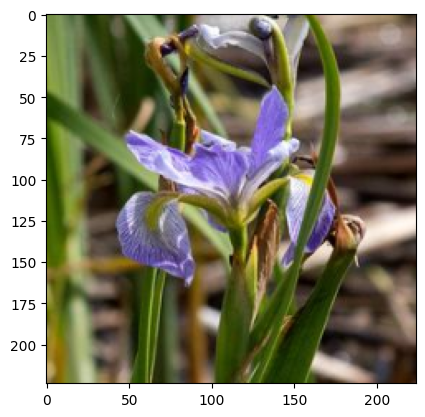

In [ ]:
index = 50

print(f'Real: {from_softmax_to_iris(y_test[index])}')
print(f'Prediction: {from_softmax_to_iris(pred[index])}')

plt.imshow(X_test[index]/255)